<a href="https://colab.research.google.com/github/Deok-Hun/Aiffel_Kun/blob/master/Ex_2_2__%EB%82%A0%EC%94%A8_%EC%A2%8B%EC%9D%80_%EC%9B%94%EC%9A%94%EC%9D%BC_%EC%98%A4%ED%9B%84_%EC%84%B8_%EC%8B%9C%2C_%EC%9E%90%EC%A0%84%EA%B1%B0_%ED%83%80%EB%8A%94_%EC%82%AC%EB%9E%8C%EC%9D%80_%EB%AA%87_%EB%AA%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
from os.path import join

In [3]:
os.environ['HOME']=''
print(os.getenv('HOME'))

# 데이터 가져오기

In [4]:
data_dir=os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_2/data/bike/bike_sharing-demand'

train_data_path = join(data_dir,'train.csv')
sub_data_path=join(data_dir,'test.csv')

print(train_data_path)
print(sub_data_path)

/content/drive/MyDrive/Exploration/Exploration_2/data/bike/bike_sharing-demand/train.csv
/content/drive/MyDrive/Exploration/Exploration_2/data/bike/bike_sharing-demand/test.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train=pd.read_csv(train_data_path)
sub=pd.read_csv(sub_data_path)

print('train data dim: {}'.format(train.shape))
print('sub data dim: {}'.format(sub.shape))

train data dim: (10886, 12)
sub data dim: (6493, 9)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# datetime 컬럼을 datetime 자료형으로 변환하고 연,월,일,시,분,초까지 6가지 컬럼 생성하기

In [8]:
train['datetime']=pd.to_datetime(train['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [10]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
del train['datetime']
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


# year,month,day,hour,minute,second 데이터 개수 시각화 하기

In [11]:
import seaborn as sns

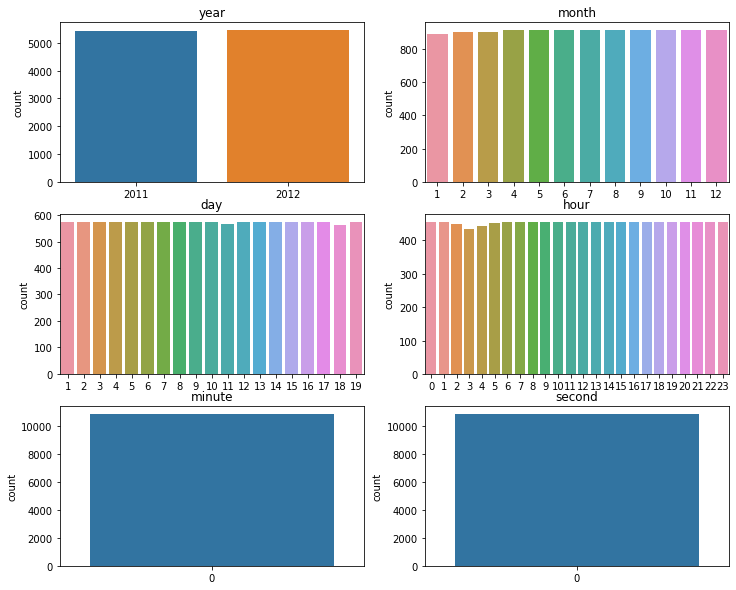

In [12]:
plt.figure(figsize=(12,10))

plt.subplot(3,2,1)
sns.countplot(data=train, x="year").set_xlabel('')
plt.title("year")
plt.subplot(3,2,2)
sns.countplot(data=train, x="month").set_xlabel('')
plt.title("month")
plt.subplot(3,2,3)
sns.countplot(data=train, x="day").set_xlabel('')
plt.title("day")
plt.subplot(3,2,4)
sns.countplot(data=train, x="hour").set_xlabel('')
plt.title("hour")
plt.subplot(3,2,5)
sns.countplot(data=train, x="minute").set_xlabel('')
plt.title("minute")
plt.subplot(3,2,6)
sns.countplot(data=train, x="second").set_xlabel('')
plt.title("second")
plt.show()

# X, y 컬럼 선택 및 train/test 데이터 분리

In [13]:
y=train['count']
del train['count']

print(train.columns)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day',
       'hour', 'minute', 'second'],
      dtype='object')


In [14]:
X=train.copy()
del X['casual']
del X['registered']
del X['minute']
del X['second']

X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4


In [15]:
print(X.shape, y.shape)

(10886, 12) (10886,)


In [16]:
print(sub.shape)

(6493, 9)


In [17]:
print(sub.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


In [18]:
sub['datetime']=pd.to_datetime(sub['datetime'])
sub['year']=sub['datetime'].dt.year
sub['month']=sub['datetime'].dt.month
sub['day']=sub['datetime'].dt.day
sub['hour']=sub['datetime'].dt.hour

del sub['datetime']

sub.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 12) (8708,)
(2178, 12) (2178,)


# LinearRegression 모델 학습

In [20]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [21]:
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred=model.predict(X_test)
y_pred    # 모델 예측 값

array([251.98226449,  32.80765597, 181.07615381, ..., 140.03102894,
       254.58018199, 416.44087793])

# 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [23]:
y_test - y_pred

7975    -12.982264
5954     -4.807656
8372   -139.076154
3398    -88.207027
2472    -93.194613
           ...    
7356    -12.119965
186      55.641982
7654    374.968971
1943    -72.580182
8269   -191.440878
Name: count, Length: 2178, dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(mse)
print(rmse)

20118.03149669611
141.8380467177129


# x 축은 'temp' 도는 'humidity'로, y축은 count 로 예측 결과 시각화하기

In [28]:
import matplotlib.pyplot as plt

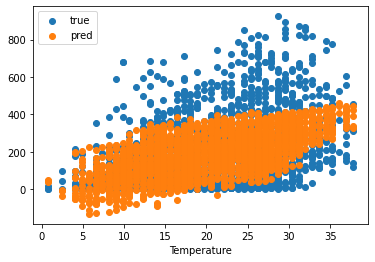

In [65]:
plt.scatter(X_test.iloc[:, 4], y_test, label="true")
plt.scatter(X_test.iloc[:, 4], y_pred, label="pred")
plt.legend()
plt.xlabel("Temperature")
plt.show()

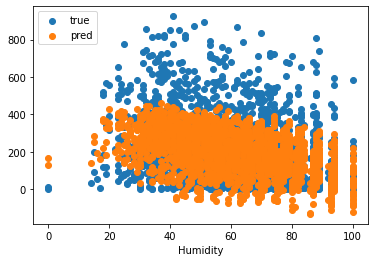

In [66]:
plt.scatter(X_test.iloc[:, 6], y_test, label="true")
plt.scatter(X_test.iloc[:, 6], y_pred, label="pred")
plt.legend()
plt.xlabel("Humidity")
plt.show()